In [71]:
#Importing the Needed Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [72]:
#Loading the dataset into DataFrame
water_data = pd.read_csv("/kaggle/input/waterquallity/waterQuality1.csv")

In [73]:
#Printing the first 10 instance
water_data.head(10)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.6,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,...,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.04,0.66,0.001,6.22,0.10,1.86,0.86,0.16,...,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,...,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,...,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1


In [74]:
#Some information about each colums : its DataType and how many NON-NULL values it have
water_data.info()        

#It shows there is 0 NULLs
#All variables datatype are Numerical except ammonia & is_safe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [75]:
#before Analyzing These 2 Columns let's make sure the dataset is clean
water_data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [76]:
#Now we have a problem in ammonia column that it have numbers as a string datatype and this is easy to handle but what about some values with string DataType?

# Filter out non-numeric strings and convert to numeric
water_data['ammonia'] = water_data['ammonia'].apply(pd.to_numeric, errors='coerce')         

#use to_numeric function that convert numbers with str type into Numbers and if it can not then this is a real str value so coerce make sure to convert these values into NaN to handle it easily

# Drop rows where 'ammonia' could not be converted to numeric 'NULLs'
water_data.dropna(subset=['ammonia'], inplace=True)

#Now is this column becomes Numerical DataType?
water_data.info()           #Yes it is 

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [77]:
#Now Analyze is_safe column
water_data.is_safe.value_counts()

#it shows values with 0 and 1 then we only need to make its type from str to numeric
#note also that there is imbalance in values we need to handle before fed it to the model but will handle it later

is_safe
0    7084
1     912
Name: count, dtype: int64

In [78]:
water_data.is_safe = water_data.is_safe.replace({'0':0,'1':1})

In [79]:
water_data.info()           #Now we have clean dataset with 0 NULLs and All columns have numerical DataType

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [80]:
#Some Mathematical Description about each column 
water_data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [81]:
#after Cleaning how many instances and features do we haver
water_data.shape

(7996, 21)

In [82]:
#ٍDiscover Data Throught Visualization

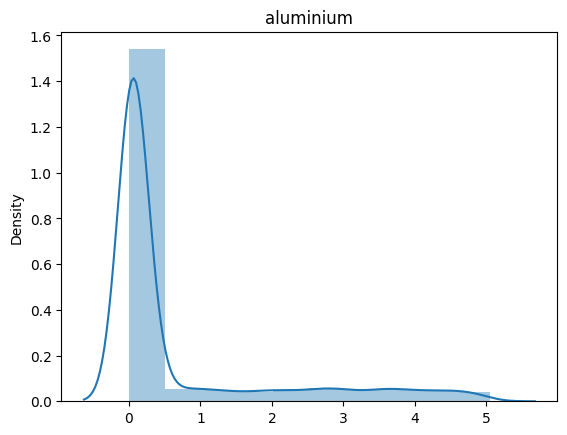

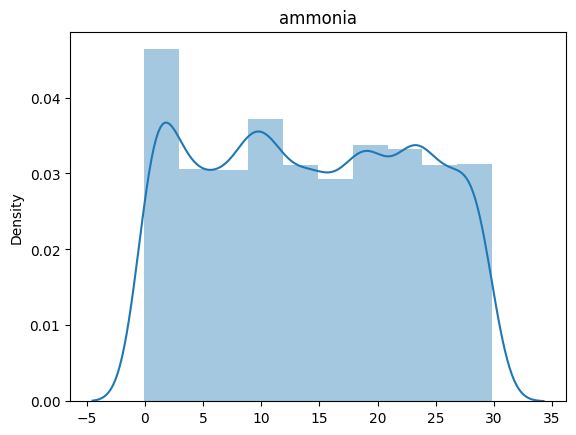

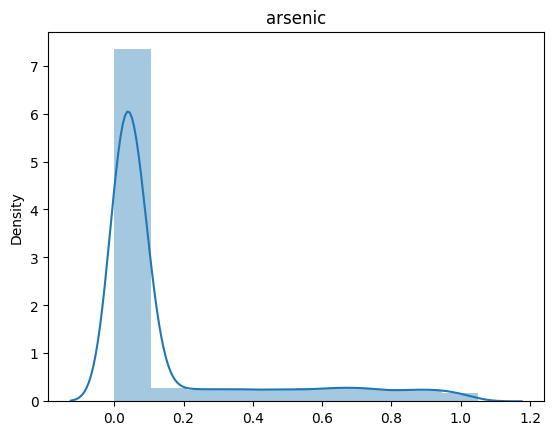

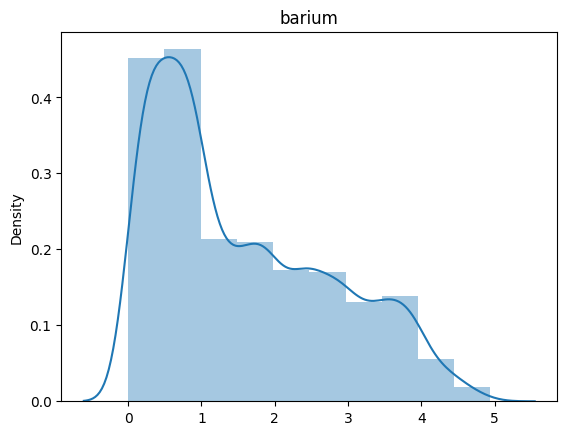

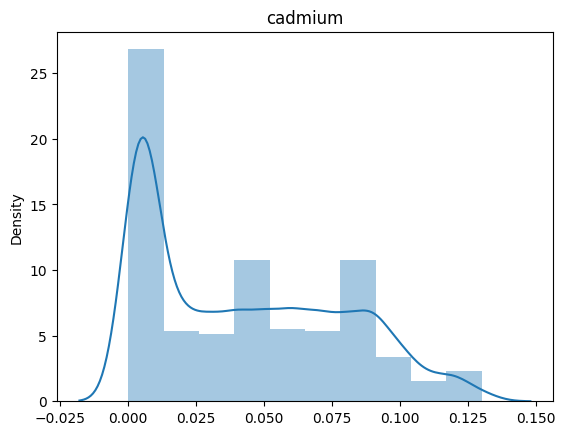

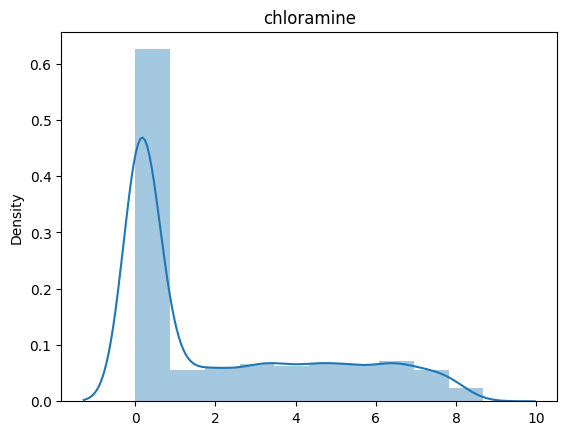

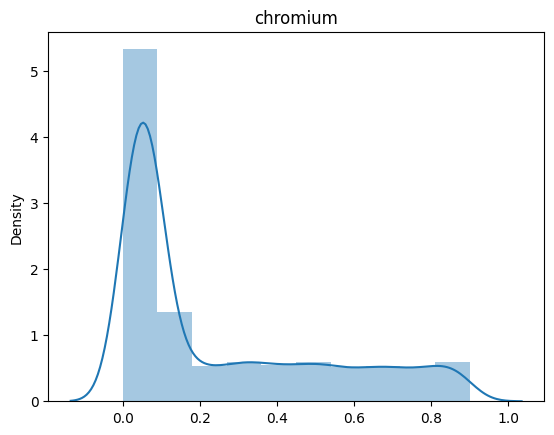

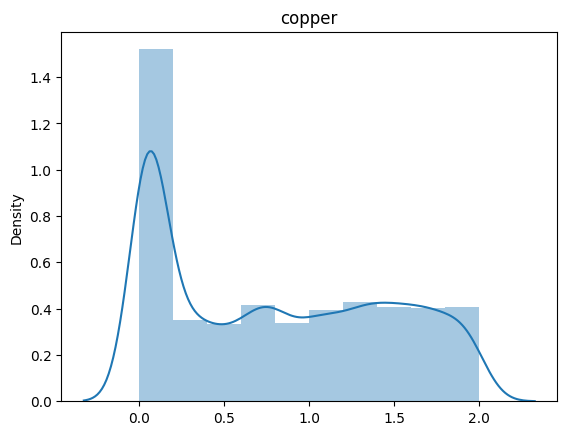

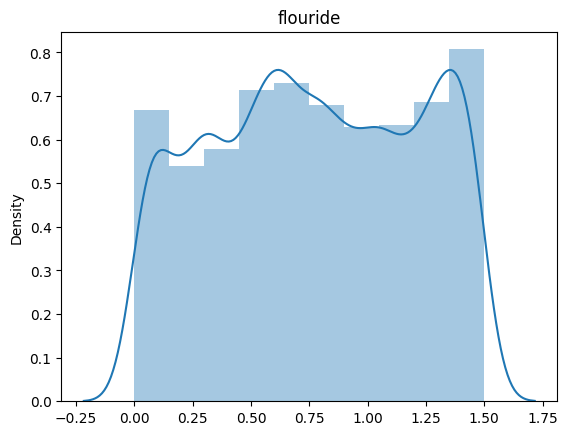

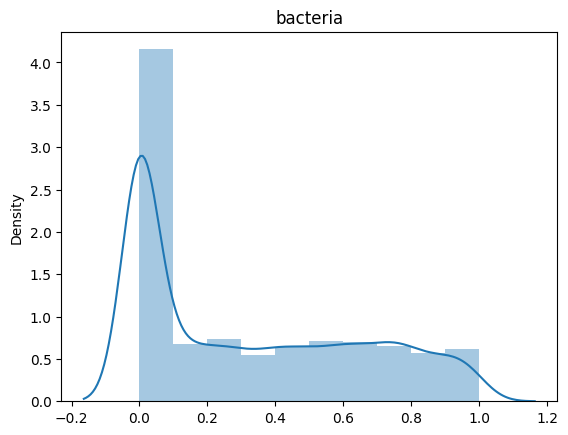

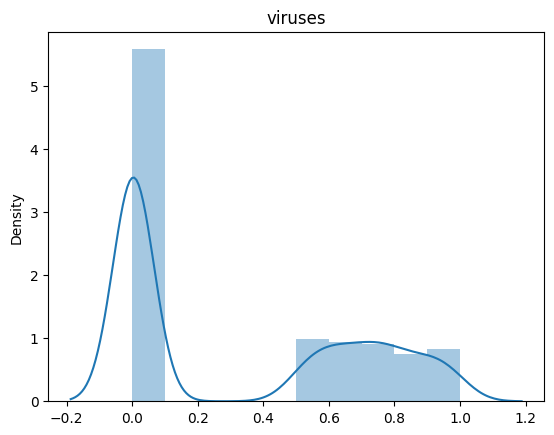

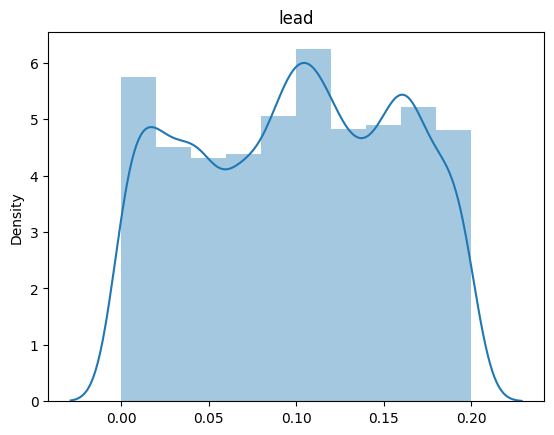

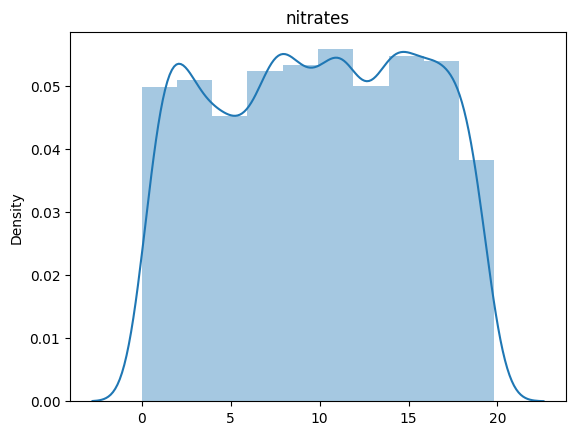

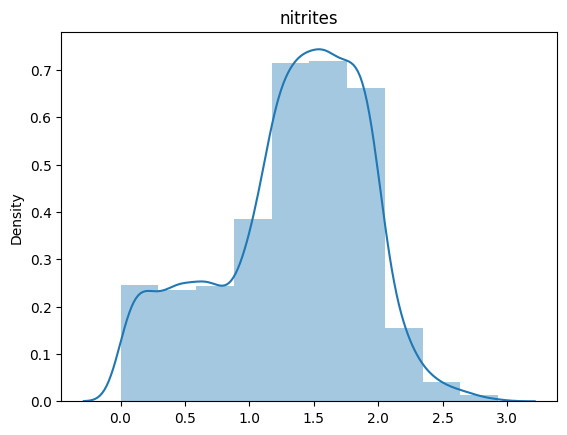

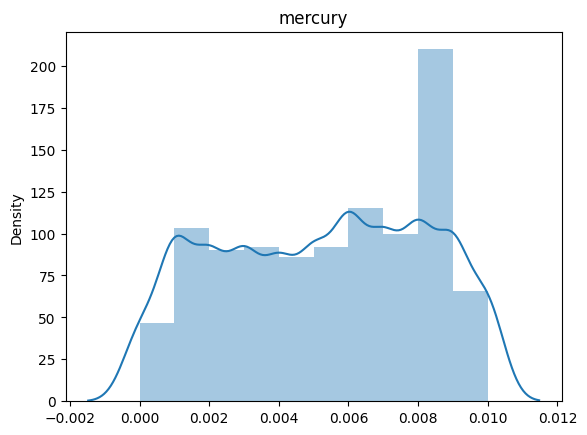

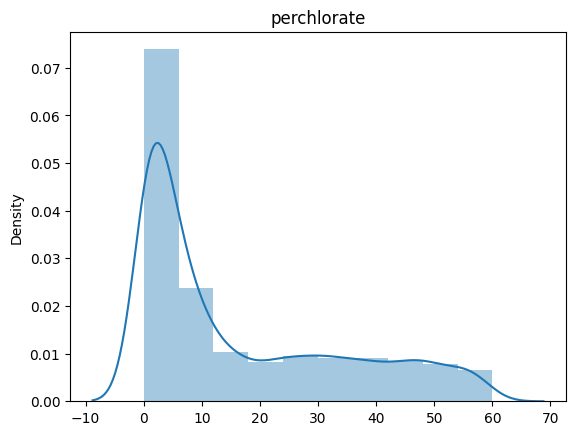

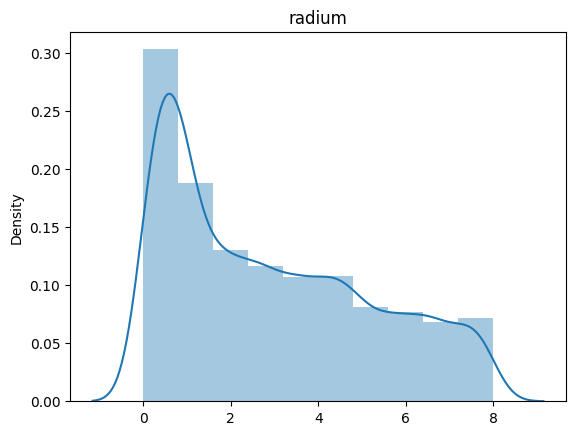

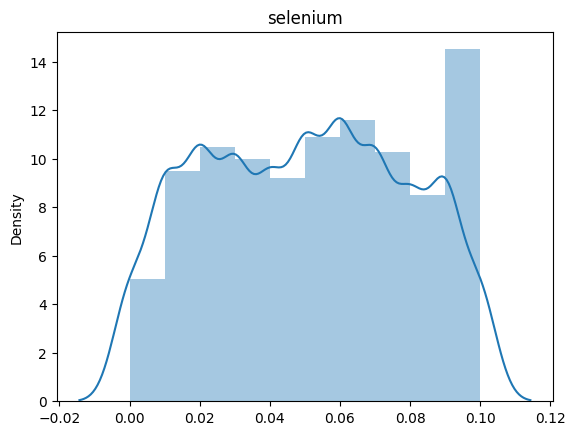

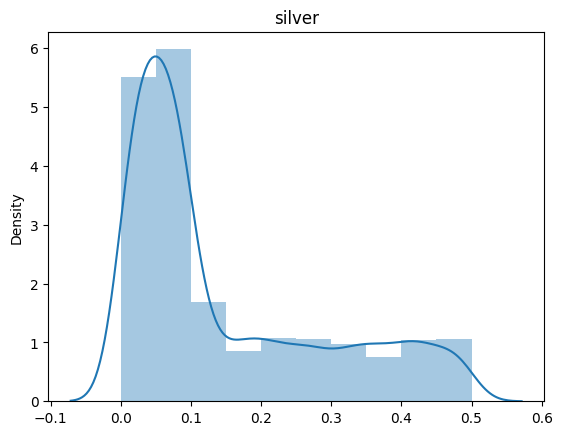

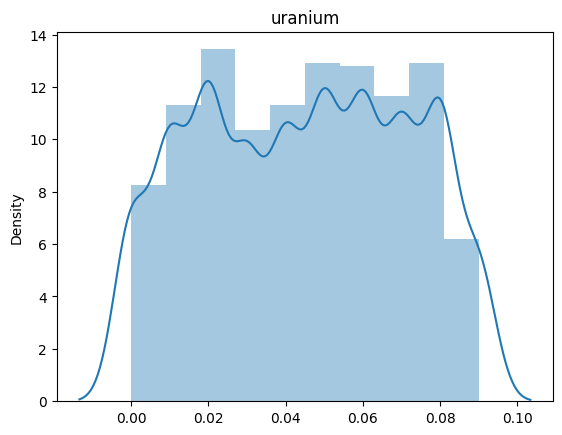

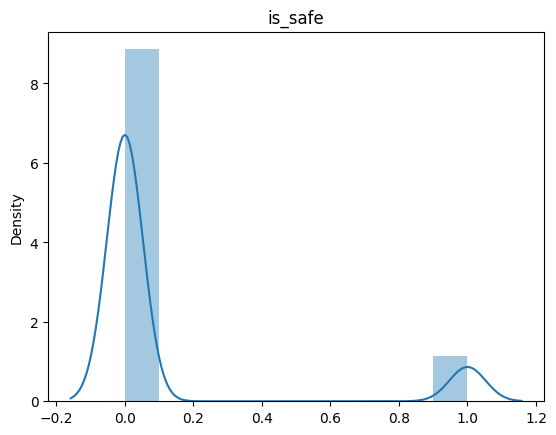

In [83]:
for col in water_data.columns:
    sns.distplot(bins=10,x=water_data[col])
    plt.title(col)
    plt.show()

<Axes: >

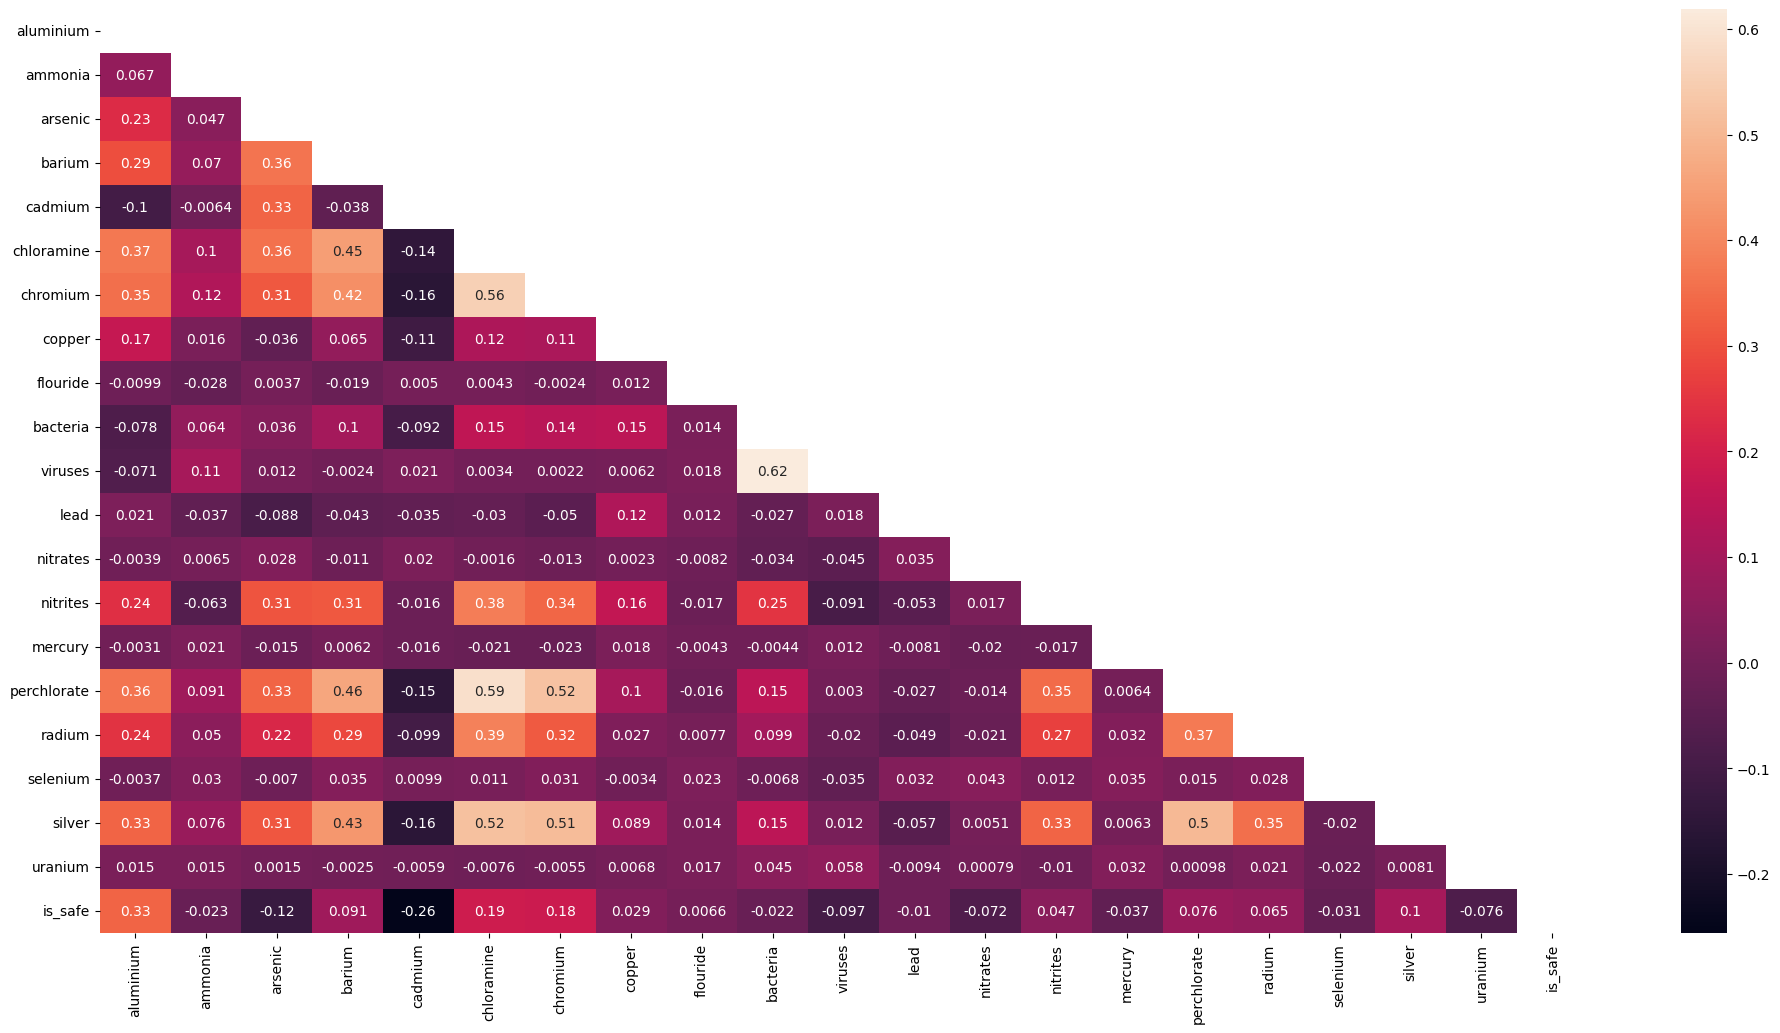

In [84]:
#Correlation between Columns:
plt.figure(figsize=(24,12))
sns.heatmap(water_data.corr(),annot=True,mask = np.triu(np.ones_like(water_data.corr(), dtype=bool)))

In [85]:
#Some Information from this heatmap:
#there is a slightly strong correrlation between silver and perchlorate '0.50'
#there is a slightly strong correrlation between perchlorate and chloramine '0.59'
#the most strong correrlation between is_safe and column isd aluminium '0.33'

In [45]:
##Now let's Handle the imbalance data before go to the model steps  'Using UnderSampling Method'
#
#
## Sample 912 rows from category 0 to balance the dataset
#balanced_data_category_0 = water_data[water_data['is_safe'] == 0].sample(n=912, random_state=42)
#
## Combine sampled category 0 rows with category 1 rows
#balanced_data = pd.concat([balanced_data_category_0, water_data[water_data['is_safe'] == 1]])
#
## Print the balanced DataFrame
#print("Balanced DataFrame:")
#balanced_data.is_safe.value_counts()         #now it is balanced

Balanced DataFrame:


is_safe
0    912
1    912
Name: count, dtype: int64

In [86]:
#for col in balanced_data.columns : 
#    plt.figure()
#    print(col,"boxplot :",sns.boxplot(balanced_data[col]))
#    plt.show()

In [87]:
##Let's Remove outliers
# #Calculate IQR for arsenic column
#Q1 = balanced_data['arsenic'].quantile(0.25)
#Q3 = balanced_data['arsenic'].quantile(0.75)
#IQR = Q3 - Q1
#
## Define bounds for outlier detection
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 0.6 * IQR
#
## Create mask for outliers
#outlier_mask = (balanced_data['arsenic'] < lower_bound) | (balanced_data['arsenic'] > upper_bound)
#
## Remove outliers
#balanced_data_no_outliers = balanced_data[~outlier_mask]
#
## Visualize box plot after outlier removal
#plt.figure()
#sns.boxplot(balanced_data_no_outliers['arsenic'])
#plt.title('Arsenic Column After Removing Outliers')
#plt.show()


In [88]:
#balanced_data_no_outliers.is_safe.value_counts()

In [89]:
#split the data into features and label
x=water_data.drop('is_safe',axis=1)
y=water_data.is_safe

In [51]:
##split the data into features and label
#x=balanced_data_no_outliers.drop('is_safe',axis=1)
#y=balanced_data_no_outliers.is_safe

In [141]:
#Split them into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)

In [142]:
from imblearn.over_sampling import SMOTE

# Check the number of samples in each class before applying SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE to oversample the minority class (class 1)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Check the number of samples in each class after applying SMOTE
print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Before SMOTE:
is_safe
0    5294
1     703
Name: count, dtype: int64

After SMOTE:
is_safe
0    5294
1    5294
Name: count, dtype: int64


In [143]:
#Using StandardScaler to normalize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

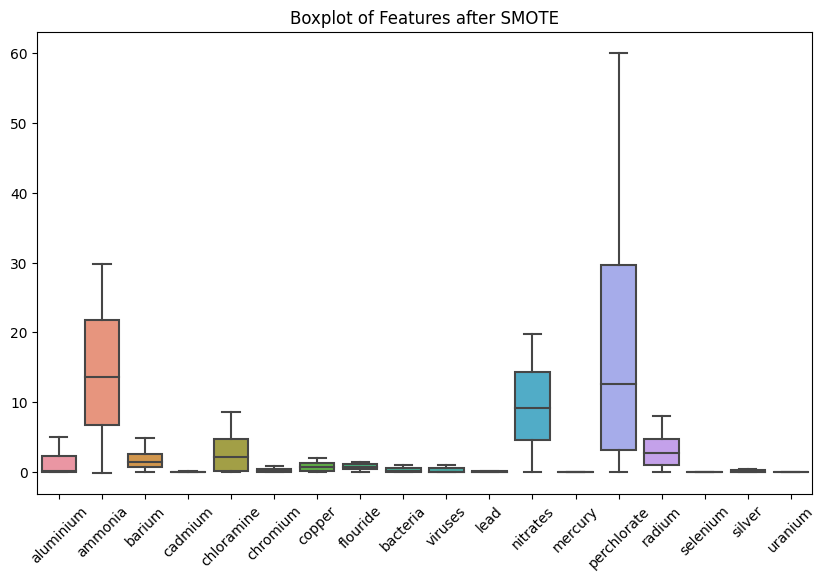

In [183]:
# Plot boxplot to visualize distribution of features after SMOTE
plt.figure(figsize=(10, 6))
sns.boxplot(data=x_train_resampled)
plt.title('Boxplot of Features after SMOTE')
plt.xticks(rotation=45)
plt.show()


In [182]:
x_train_resampled.columns

Index(['aluminium', 'ammonia', 'barium', 'cadmium', 'chloramine', 'chromium',
       'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates',
       'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium'],
      dtype='object')

In [175]:
#Load the model
model = LogisticRegression()

In [176]:
#Fitting the model
model.fit(x_train,y_train)

LogisticRegression()

In [177]:
#Evaluation


In [178]:
#Predicting on Training data
predicted_training = model.predict(x_train)

In [179]:
#Accuracy of model with training_data

accuracy = accuracy_score(predicted_training,y_train)

print('the model accuracy on Training Dataset:',accuracy*100)

the model accuracy on Training Dataset: 90.69534767383692


In [180]:
#Predicting on Testing data
predicted_testing = model.predict(x_test)

In [181]:
#Accuracy of model with training_data

accuracy = accuracy_score(predicted_testing,y_test)

print('the model accuracy on Testing Dataset:',accuracy*100)

the model accuracy on Testing Dataset: 91.44572286143071


In [2]:
#While Using UnderSampling the accuracies was:
#accuracy on Training Dataset: 82.52%
#accuracy on Testing Dataset: 83.88%


#ًWhile Using OverSampling the accuracies was:
#accuracy on Training Dataset: 90.69%
#accuracy on Testing Dataset: 91.44%